<a href="https://colab.research.google.com/github/sookyannnn/SIEW-2022-Economic-Geography-in-East-Asia-and-Pacfic/blob/main/CH01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In [ ]:
pip install pysal #run this cell first, restart runtime, run all

     |████████████████████████████████| 2.4MB 10.5MB/s 
     |████████████████████████████████| 112kB 43.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 215kB 22.1MB/s 
     |████████████████████████████████| 5.7MB 19.1MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 143kB 48.0MB/s 
     |████████████████████████████████| 235kB 38.7MB/s 
     |████████████████████████████████| 235kB 45.5MB/s 
     |████████████████████████████████| 56.4MB 63kB/s 
     |████████████████████████████████| 1.0MB 39.6MB/s 
     |████████████████████████████████| 1.0MB 53.3MB/s 
     |████████████████████████████████| 19.1MB 1.2MB/s 
     |████████████████████████████████| 2.1MB 50.3MB/s 
     

In [ ]:
pip install geopandas

In [ ]:
pip install contextily

     |████████████████████████████████| 133kB 12.2MB/s 
ERROR: pysal 2.4.0 has requirement urllib3>=1.26, but you'll have urllib3 1.25.11 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.3
    Uninstalling urllib3-1.26.3:
      Successfully uninstalled urllib3-1.26.3


In [ ]:
pip install keplergl

     |████████████████████████████████| 7.9MB 6.2MB/s 
  Created wheel for keplergl: filename=keplergl-0.2.2-py2.py3-none-any.whl size=15942747 sha256=4454b15468b667b77ab32be88c62bbbf09a54b41edf91400b75b4e4c58efcc01
  Stored in directory: /root/.cache/pip/wheels/0e/78/c4/04ea0dbf6447ad708393751cd6ea453fb682f4c1c734f2247b
Successfully built keplergl


#Load Packages

In [ ]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from keplergl import KeplerGl
import seaborn as sns
import pandas as pd
from pysal.viz import mapclassify
import numpy as np

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Load Dataset

1.   Duplicate this Google Drive folder : https://drive.google.com/drive/folders/1C0lNnGSsCGdQ8kC-gGEBYt8L9UeAaNcv?usp=sharing
2.   Mount Google Drive to Google Collab

## Satellite Nightlight

In [ ]:
satellite = gpd.read_file("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Dataset/satellite.gpkg") 


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


## Human Development Index

In [ ]:
shdi = gpd.read_file("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Dataset/shdi.gpkg") 

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


#Plot Maps

## Countries

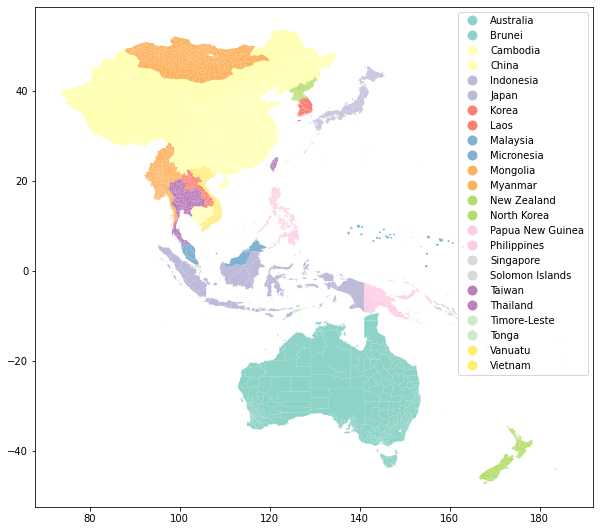

In [ ]:
# plot east asia and pacific map
satellite.plot(column="country",
        categorical=True,
        legend=True,
        figsize=(10, 10),
        cmap="Set3")

# save
plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH01-Countries.png", dpi = 72)

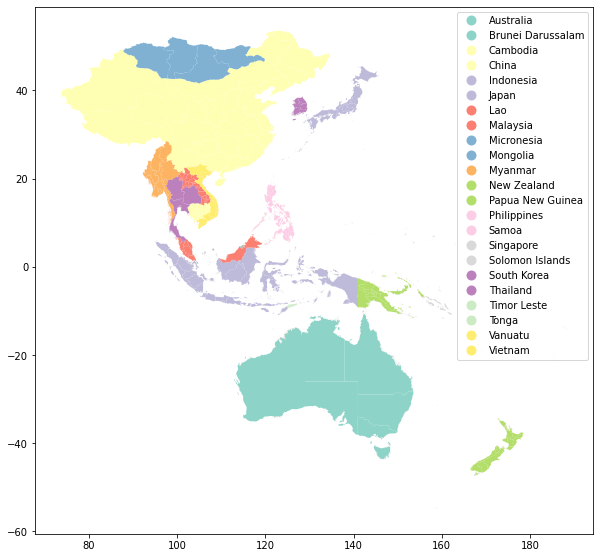

In [ ]:
# alternative using shdi
shdi.plot(column="country",
        categorical=True,
        legend=True,
        figsize=(10, 10),
        cmap="Set3")

# save
plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH01-Countries(2).png", dpi = 72)

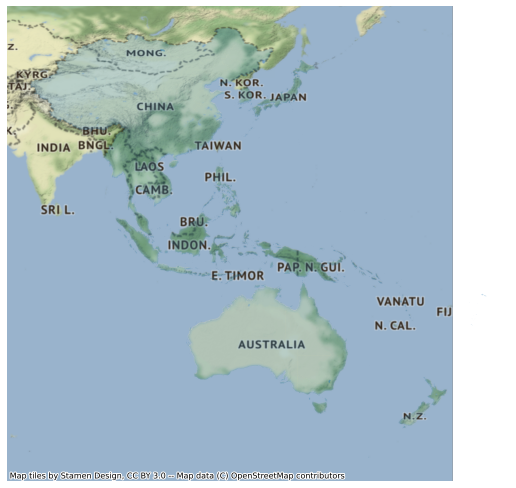

In [ ]:
# add basemap for conceptualisation

# set crs
shdi.to_crs(epsg=4326)

# Set up axes and size
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot 
# Change alpha
shdi.plot(alpha=0.25, ax=ax)

# Add base map
cx.add_basemap(ax, crs=shdi.crs)

# Remove axis
ax.set_axis_off()

# Quantiles Map

* break points are assigned in a way that leaves exactly the same amount of observations between each of them.

##Population density

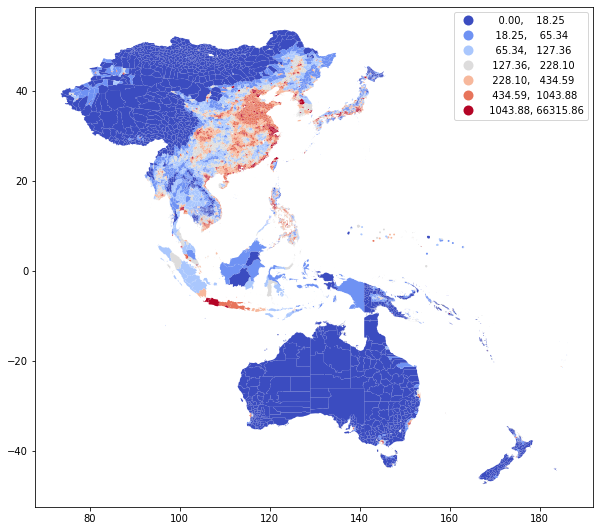

In [ ]:
satellite.plot(column="popdens_18", 
        scheme="quantiles", 
        k=7,
        cmap="coolwarm",
        legend=True,
        figsize=(10, 10)
       )

# save
plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH01-Population Density.png", dpi = 72)

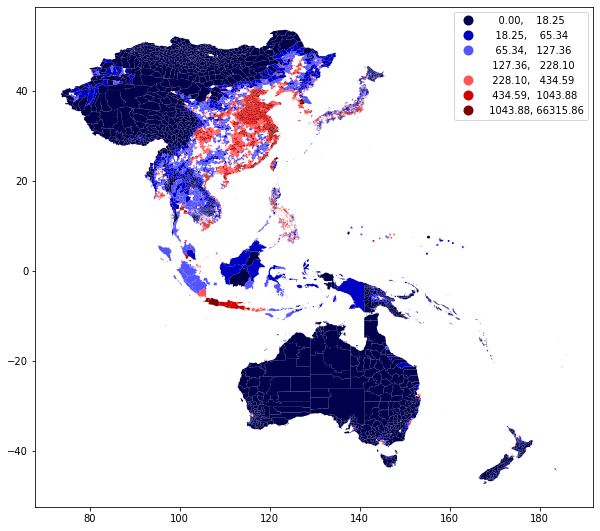

In [ ]:
# alternative

satellite.plot(column="popdens_18", 
        scheme="quantiles", 
        k=7,
        cmap="seismic",
        legend=True,
        figsize=(10, 10)
       )

# save
plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH01-Population Density(2).png", dpi = 72)

## Satellite Nightlight

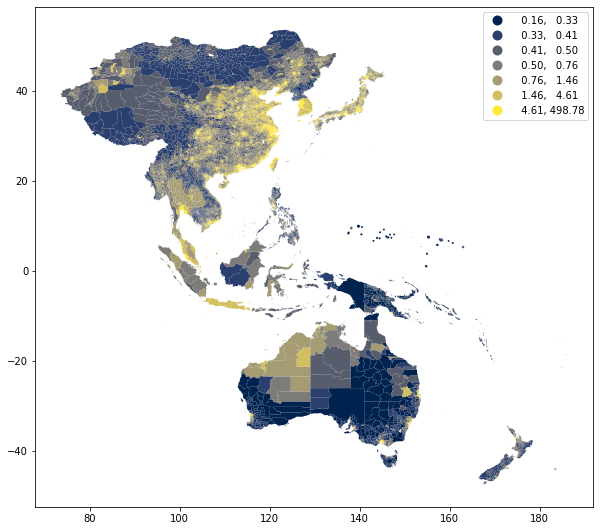

In [ ]:
satellite.plot(column="econ_2018", 
        scheme="quantiles", 
        k=7,
        cmap="cividis",
        legend=True,
        figsize=(10, 10)
       )

# save
plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH01-Satellite.png", dpi = 72)

## Human Development Index

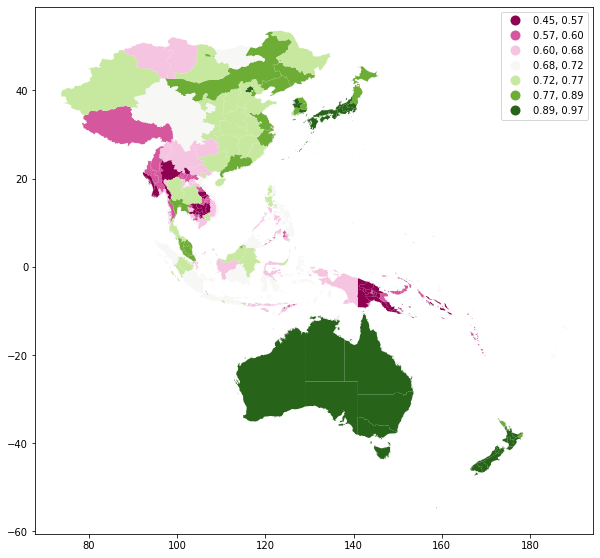

In [ ]:
shdi.plot(column="shdi_2018", 
        scheme="quantiles", 
        k=7,
        cmap="PiYG",
        legend=True,
        figsize=(10, 10)
       )

# save
plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH01-SHDI.png", dpi = 72)

### Measuring distribution (WiP)

In [ ]:
# To get further insight into the quantile classification
classi = mapclassify.Quantiles(shdi["shdi_2018"], k=7)
classi

Quantiles           

  Interval     Count
--------------------
[0.45, 0.57] |    35
(0.57, 0.60] |    35
(0.60, 0.68] |    36
(0.68, 0.72] |    35
(0.72, 0.77] |    33
(0.77, 0.89] |    35
(0.89, 0.97] |    35

In [ ]:
# inspect bins
classi.bins

array([0.56571429, 0.60342857, 0.683     , 0.719     , 0.76614286,
       0.89257143, 0.972     ])

In [ ]:
sns.distplot(queen_card, bins=10)

This can also be represented visually with a kernel density plot where the break points are included as well:
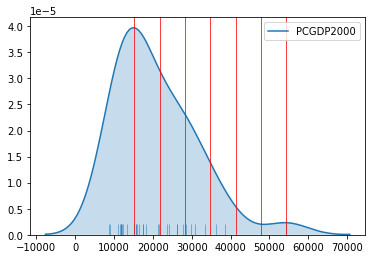